In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Regressão Linear


In [4]:
# Dados
df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df.head()

,bairro,areaM2,suites,dormitorios,banheiros,vagas,preco
0,vila-nova-conceicao,32,1,1,1,1,490000
1,vila-nova-conceicao,157,2,2,2,2,3180000
2,vila-nova-conceicao,205,2,3,3,3,1900000
3,vila-nova-conceicao,193,3,3,3,3,3565000
4,vila-nova-conceicao,116,1,3,2,2,1605000


In [5]:
# Seleção das colunas numéricas
dfnum = df.select_dtypes(include=np.number)
dfnum.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


## Definição de mondelo usando o statsmodel

In [7]:
# Definição do modelo
# modelo = sm.ols( o_que_queremos_prever ~ colunas_utilizadas_para_isso + colunas + colunas)
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + banheiros + vagas', data=dfnum)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:10:11   Log-Likelihood:                -55098.
No. Observations:                3741   AIC:                         1.102e+05
Df Residuals:                    3735   BIC:                         1.102e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1713.8448   4.06e+04      0.042      

> Valores abaixo de 0.05 são significativos


> Para retirar o intercept temos que colocar `-1` nas colunas de dados, exemplo:
>
> `lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnum)`

> O statsmodel consegue criar modelos com colunas categóricas, como bairro:
>
>`lm_all = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas + bairro', data=df)`
>
> Apesar de cada "bairro" ter uma significância diferente, não podemos separá-los.
> A API statsmodels automaticamente cria variáveis dummy para a variável categórica 'bairro'.
>
> Cada bairro, exceto um (que serve como referência), terá uma variável dummy associada.
>
> Os coeficientes dessas variáveis dummy indicam o impacto de cada bairro no preço em relação ao bairro de referência.

### Coeficientes

Não podemos afirmar que uma varíavel com **coeficiente maior em termos absolutos é mais influente**, pois para determinar precisamos normalizar os atributos.

Exemplo: um valor muito baixo de coluna precisa de um coeficiente muito alto para ter impacto na regressão, se tornando "artificialmente" mais influente.

Portanto para determinar precisamos deixar todos os valores na mesma escala.

### Predição de valores

In [9]:
# seu código
# Definição do modelo
# Menor que 0.05 é significativo
# Significativo = areaM2, suites, dormitorios, vagas
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnum)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:13:46   Log-Likelihood:                         -55099.
No. Observations:                3741   AIC:                                  1.102e+05
Df Residuals:                    3737   BIC:                                  1.102e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [10]:
x = pd.DataFrame({'areaM2': [134],
                  'suites': [1],
                  'dormitorios': [4],
                  'vagas': [2]})
preco_estimado = lm.predict(x)[0]

print(f'Preço estimado: {preco_estimado:.2f}')

Preço estimado: 949268.27


### Normalização

In [12]:
# Normalização dos dados
dfnorm = dfnum / dfnum.max()
dfnorm.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,0.107023,0.166667,0.166667,0.111111,0.2,0.061250
1,0.525084,0.333333,0.333333,0.222222,0.4,0.397500
2,0.685619,0.333333,0.500000,0.333333,0.6,0.237500
3,0.645485,0.500000,0.500000,0.333333,0.6,0.445625
4,0.387960,0.166667,0.500000,0.222222,0.4,0.200625


In [13]:
# Treinamento normalizado
lmnorm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=dfnorm)

# Treinamento
lmnorm = lmnorm.fit()

# Resultados
print(lmnorm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              8233.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:19:03   Log-Likelihood:                          4363.9
No. Observations:                3741   AIC:                                     -8720.
Df Residuals:                    3737   BIC:                                     -8695.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

> Agora podemso afirmar que a área (`areaM2`) influencia mais no preço.

In [14]:
# Predição Normalizada
xnorm = x / dfnum.max()
preco_estimado_norm = lmnorm.predict(xnorm)[0]
print(f'Preço estimado normalizado: {preco_estimado_norm:.2f}')


Preço estimado normalizado: 0.12


In [15]:
# Desnormalizar o preço
preco_estimado_desnorm = preco_estimado_norm * dfnum['preco'].max()
print(f'Preço estimado desnormalizado: {preco_estimado_desnorm:.2f}')

Preço estimado desnormalizado: 949268.27


#### Minmax e Standard Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
scaler_minmax = scaler_minmax.fit(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_minmax.transform(df_minmax[['areaM2', 'suites', 'dormitorios', 'vagas']])

# StandardScaler
scaler_standard = StandardScaler()
df_stdscale = df.copy()
scaler_standard = scaler_standard .fit(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])
df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']] = scaler_standard.transform(df_stdscale[['areaM2', 'suites', 'dormitorios', 'vagas']])

In [17]:
lm = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas - 1', data=df_minmax)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              7805.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        12:24:31   Log-Likelihood:                         -55188.
No. Observations:                3741   AIC:                                  1.104e+05
Df Residuals:                    3737   BIC:                                  1.104e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [20]:
df_case = pd.DataFrame()
df_case['areaM2'] = [134]
df_case['suites'] = [1]
df_case['dormitorios'] = [4]
df_case['vagas'] = [2]

df_case_minmax = scaler_minmax.transform(df_case)
df_case_minmax

array([[0.40860215, 0.        , 0.6       , 0.25      ]])

In [21]:
df_case_minmax = pd.DataFrame(df_case_minmax, columns=['areaM2', 'suites', 'dormitorios', 'vagas'])
df_case_minmax

,areaM2,suites,dormitorios,vagas
0,0.408602,0.0,0.6,0.25


In [22]:
preco = lm.predict(df_case_minmax)

print()
print(f'Preco estimado: {preco[0]:.2f}')


Preco estimado: 1085921.06


### Problemas nos Dados

A normalização das variáveis preditoras pode afetar as previsões de um modelo de regressão linear, embora o impacto direto nas previsões em si não seja significativo. De qualquer modo isso pode ser um problema em muitos casos, de diferenças significativas, quando temos os dados sem algumas atender algunmas premissas do modelo, como a presença de outliers, heterocedasticidade etc. Veja, por exemplo, no caso desses dados a normalização standard scale.

#### Gráfico dos dados para verificar os aspectos de outliers e homocedasticidade dos dados.

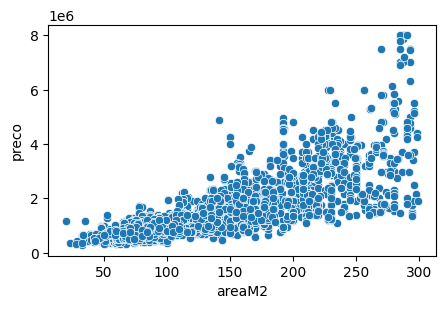

In [23]:
# Homocedasticidade
plt.figure(figsize=(5,3))

sns.scatterplot(x=df.areaM2, y=df.preco)
plt.show()

> A solução para Homocedasticidade (na maior parte dos casos) é aplicar o log nos valores.

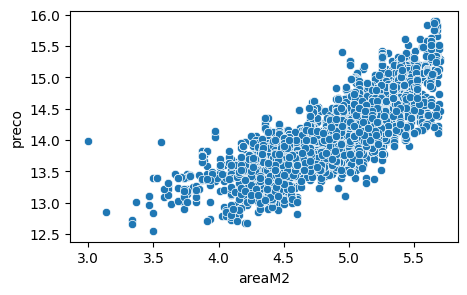

In [25]:
# Solucção para Homocedasticidade
plt.figure(figsize=(5,3))

sns.scatterplot(x=np.log(df.areaM2), y=np.log(df.preco))
plt.show()

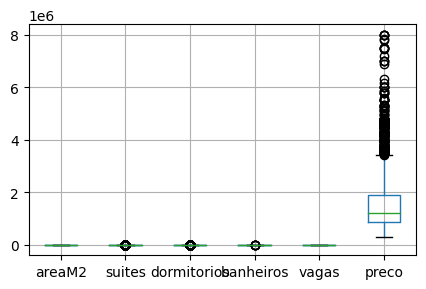

In [24]:
# Outliers
plt.figure(figsize=(5,3))

df.boxplot(figsize=(10,6))
plt.show()


## Definição do modelo usando o Scikit-learn

In [26]:
from sklearn import linear_model

x = df[['areaM2', 'suites', 'dormitorios', 'vagas']]
y = df['preco']
# regressor = linear_model.LinearRegression()
regressor = linear_model.LinearRegression(fit_intercept=False) # para tirar o intercept
regressor.fit(x, y)

y_pred = regressor.predict(x)
print(y_pred)
print('Coeficientes:', regressor.coef_)
print('Intercept', regressor.intercept_)
print('R2:', regressor.score(x,y)) # ele sempre retorna o R2 com o intercept

[ 522035.93385151 2017896.71041794 2504559.33606312 ... 1251235.51913646
 2236266.83310028 1740831.53026522]
Coeficientes: [  10471.2348679   202913.06609277 -312438.48835905  296481.84034491]
Intercept 0.0
R2: 0.6845683088812347


> O Sciket-learn sempre mostra o R2 com o intercept

> A diferença entre os modelos se dá pois o statsmodels usa o método dos mínimos quadrados (MQO) para encontrar os coeficientes da regressão, enquanto o scikit-learn usa outros métodos de otimização, que podem levar a resultados ligeiramente diferentes.


In [27]:
df_case = pd.DataFrame({'areaM2': [134],
                        'suites': [1],
                        'dormitorios': [4],
                        'vagas': [2]})

In [28]:
regressor.predict(df_case)

array([949268.26564532])

> O Scikit-learn não consegue trabalhar com colunas categóricas por padrão, para usálo é preciso criar uma coluna binária de cada bairro nos dados:
>
> ```
Vila Mariana | Vila Nova Conceição
     0       |          1
     1       |          0
```

# Regressão Linear Robusta

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Regressão com Termos de Interação
Um conceito importante na análise de regressão é o de termos de interação. Os termos de interação permitem examinar como a relação entre o alvo e a variável independente muda dependendo do valor de outra variável independente.

In [31]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (16, 8)


<ipython-input-31-e266fb4ce48c>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [36]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
print(mtcars.__doc__)

.. container::

   .. container::

      ====== ===============
      mtcars R Documentation
      ====== ===============

      .. rubric:: Motor Trend Car Road Tests
         :name: motor-trend-car-road-tests

      .. rubric:: Description
         :name: description

      The data was extracted from the 1974 *Motor Trend* US magazine,
      and comprises fuel consumption and 10 aspects of automobile design
      and performance for 32 automobiles (1973–74 models).

      .. rubric:: Usage
         :name: usage

      .. code:: R

         mtcars

      .. rubric:: Format
         :name: format

      A data frame with 32 observations on 11 (numeric) variables.

      ===== ======== ========================================
      [, 1] ``mpg``  Miles/(US) gallon
      [, 2] ``cyl``  Number of cylinders
      [, 3] ``disp`` Displacement (cu.in.)
      [, 4] ``hp``   Gross horsepower
      [, 5] ``drat`` Rear axle ratio
      [, 6] ``wt``   Weight (1000 lbs)
      [, 7] ``qsec`` 1/4 mi

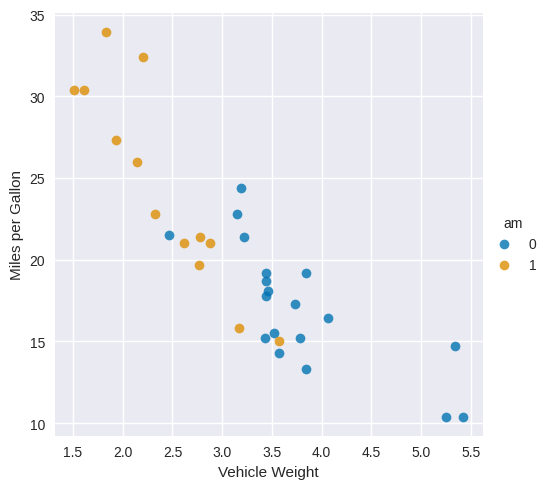

In [37]:
df = mtcars.data
df.head()
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight");

In [38]:
model_1 = smf.ols(formula="mpg ~ wt + am", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.58e-09
Time:                        13:53:29   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.000      31.074      43.569
wt            -5.3528      0.788     -6.791      0.000      -6.965      -3.741
am            -0.0236      1.546     -0.015      0.988      -3.185       3.138
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.413
Skew:                           0.670   Prob(JB):                        0.299
Kurtosis:                       2.881   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interação:

In [39]:
# A interação a*b é representada como a:b
model_2 = smf.ols(formula="mpg ~ wt + am + wt:am", data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           5.21e-11
Time:                        13:53:51   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.000      25.230      37.602
wt            -3.7859      0.786     -4.819      0.000      -5.395      -2.177
am            14.8784      4.264      3.489      0.002       6.144      23.613
wt:am         -5.2984      1.445     -3.667      0.001      -8.258      -2.339
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.088
Skew:                           0.761   Prob(JB):                        0.213
Kurtosis:                       2.963   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('http://meusite.mackenzie.br/rogerio/data_load/regressao_preco_imoveis.xlsx')
df = df.drop(columns='bairro')
df.head()

,areaM2,suites,dormitorios,banheiros,vagas,preco
0,32,1,1,1,1,490000
1,157,2,2,2,2,3180000
2,205,2,3,3,3,1900000
3,193,3,3,3,3,3565000
4,116,1,3,2,2,1605000


### Statsmodel

In [20]:
# Modelo de regreção com iteração (dormitorios+suites e areaM2+vagas
lm_inter = sm.ols(formula='preco ~ areaM2 + suites + dormitorios + vagas + dormitorios:vagas + areaM2:vagas -1', data=df)
lm_inter = lm_inter.fit()
print(lm_inter.summary())
print()

calculate_metrics(df.preco, lm_inter.predict(df.drop(columns='preco')))
print()

df_case = pd.DataFrame({'areaM2':[134], 'suites':[1], 'dormitorios':[4], 'vagas':[2]})
df_case

preco_inter = lm_inter.predict(df_case)
print()
print(f'Preço estimado: {preco_inter[0]:.2f}')

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              6100.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                        0.00
Time:                        22:34:05   Log-Likelihood:                         -54920.
No. Observations:                3741   AIC:                                  1.099e+05
Df Residuals:                    3735   BIC:                                  1.099e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Scikit-learn

In [21]:
df['dormitorios:suites'] = df[ 'dormitorios'] * df['suites']
df['areaM2:vagas'] = df['areaM2'] * df['vagas']

df_case['dormitorios:suites'] = df_case['dormitorios'] * df_case['suites']
df_case['areaM2:vagas'] = df_case['areaM2'] * df_case['vagas']

display(df.head())
display(df_case)

,areaM2,suites,dormitorios,banheiros,vagas,preco,dormitorios:suites,areaM2:vagas
0,32,1,1,1,1,490000,1,32
1,157,2,2,2,2,3180000,4,314
2,205,2,3,3,3,1900000,6,615
3,193,3,3,3,3,3565000,9,579
4,116,1,3,2,2,1605000,3,232


,areaM2,suites,dormitorios,vagas,dormitorios:suites,areaM2:vagas
0,134,1,4,2,4,268


In [23]:
X = df.drop(columns=['preco','banheiros','dormitorios'])
y = df['preco']

model = LinearRegression(fit_intercept=False) # set fit_intercept to False
model.fit(X, y)

print("Coeficientes: ", model.feature_names_in_)
print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

# from sklearn.metrics import r2_score
# print("Score (R2)B: ", r2_score(y, model.predict(df.drop(columns=['preco','banheiros','dormitorios']))))

# está removendo apenas as colunas que não vai usar no treinamento
calculate_metrics(df.preco, model.predict(df.drop(columns=['preco','banheiros','dormitorios'])))
print()

# Predição
y_pred = model.predict(df_case.drop(columns='dormitorios'))
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  ['areaM2' 'suites' 'vagas' 'dormitorios:suites' 'areaM2:vagas']
Coeficientes:  {'areaM2': 3588.4399521448354, 'suites': 606383.2763916976, 'vagas': -91523.06646181596, 'dormitorios:suites': -129541.37263719193, 'areaM2:vagas': 2563.087340982631}
Intercept:  0.0
Score (R2):  0.7034378664247192

MSE: 341735899922.54
RMSE: 584581.82
MAPE: 25.25
MAE: 380329.39
sMAPE: 23.00
MAD: 773278.64

Preço estimado (scikit-learn): 1072930.01


## Regressores Não Lineares
Existem muitos outros modelos e que empregam paradigmas bastante diferentes do modelo Linear e permitem obter aproximações *não lineares* dos dados. Você pode por exemplo pensar que podemos aproximar uma função por diferentes polinômios, com diferentes graus, ou ainda por diferentes combinações de séries de dados como as séries de Taylor e Fourier, famosas séries para aproximação de funções na matemática.

Para nós é suficiente saber que existem muitos modelos e que, por partirem de princípios de construção diferentes, levam a diferentes soluções de aproximação da função original.

Você pode ver abaixo a aplicação de 3 modelos regressores bastante empregados o **Decision Tree Regressor**, um modelo baseado em **Máquinas de Vetores de Suporte** e **XGBoosting Regressor**. Todos tem a mesma lógica de aplicação dos estimadores do scikit-learn e da regressão linear. Você pode ainda alterar o código abaixo para experimentar outros modelos que encontram-se nos imports no início do código.


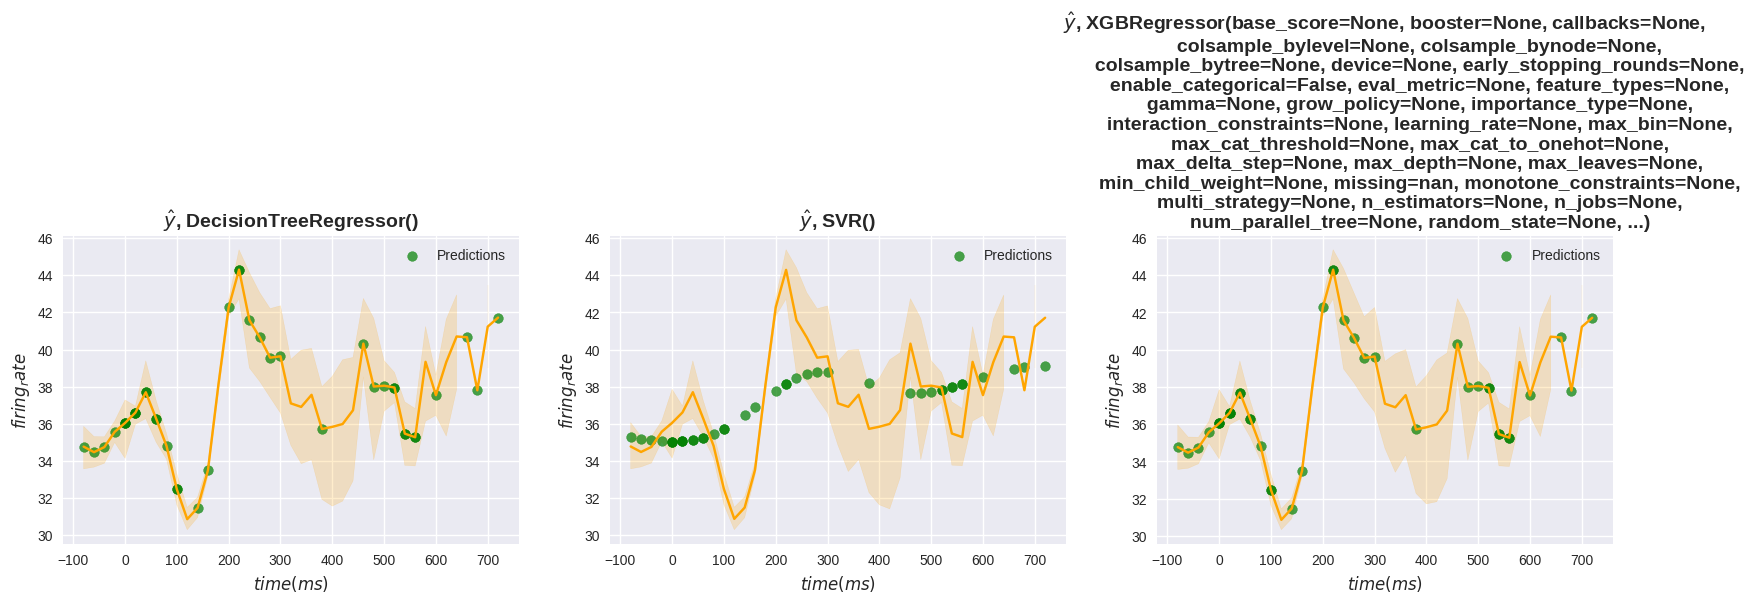

In [45]:
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].reset_index(drop=True)
df.head()

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

# Outros regressores
# base_estimators = [ MLPRegressor(max_iter=8000),
#                     DecisionTreeRegressor(),
#                     SVR(),
#                     XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()

> O melhor modelo é definido pela melhor métrica de MSE (Mean Square Error)

In [26]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.drop(columns=['longitude', 'latitude'], inplace=True)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [28]:
df_case = pd.DataFrame(df.mean()).transpose()
df_case = df_case.drop(columns='median_house_value')
df_case

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578


In [29]:
# Usando o modelo linear
X = df.drop(columns='median_house_value')
y = df.median_house_value

model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.median_house_value, model.predict(X))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'housing_median_age': 1880.014082669211, 'total_rooms': -19.95592072869588, 'total_bedrooms': 99.52477155165701, 'population': -35.01823468644445, 'households': 127.22531956281557, 'median_income': 48033.45927674914}
Intercept:  -47624.111719429085
Score (R2):  0.5713482748283873

MSE: 5765983945.18
RMSE: 75934.08
MAPE: 34.26
MAE: 55842.53
sMAPE: 29.28
MAD: 91645.59

Preço estimado (scikit-learn): 207300.91


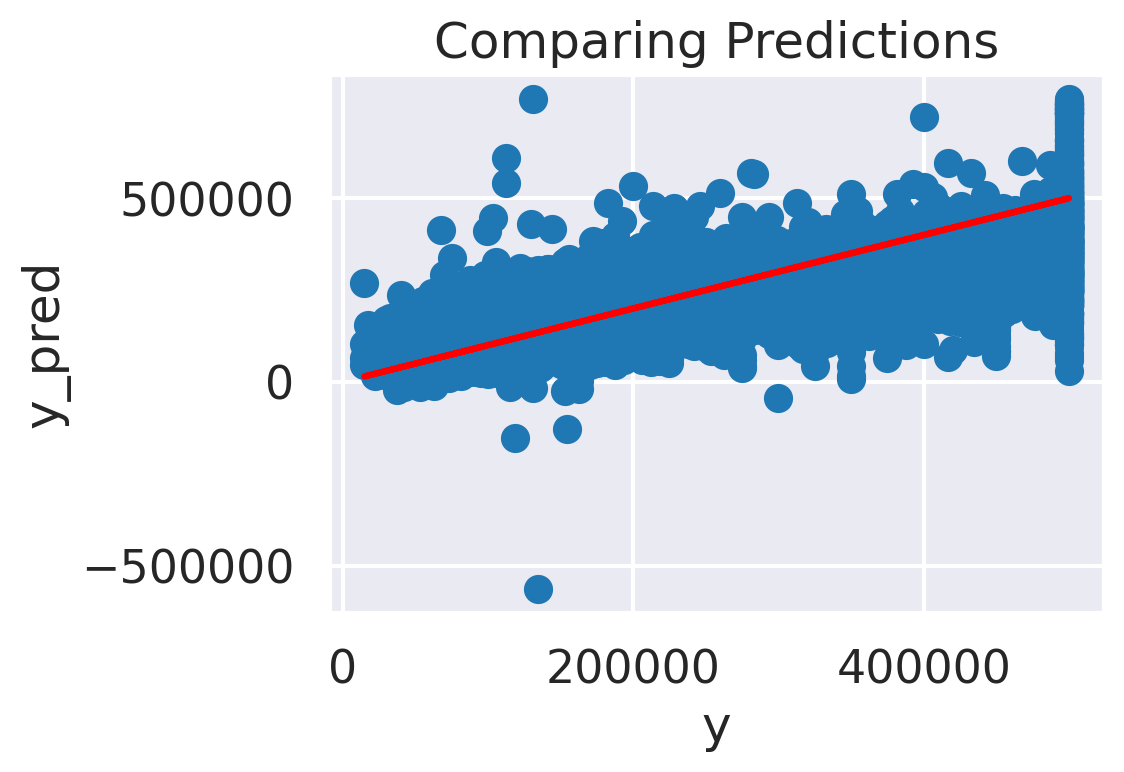

In [30]:
plt.figure(figsize=(5,3.5))

plt.scatter(y,model.predict(X))
plt.plot(y,y,color='r')

plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Comparing Predictions')

plt.show()


In [31]:
# Usando modelo não linear
from sklearn.tree import DecisionTreeRegressor

X = df.drop(columns='median_house_value')
y = df.median_house_value

model = DecisionTreeRegressor()
model.fit(X, y)

print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.median_house_value, model.predict(X))
print()

# Predição
y_pred = model.predict(df_case)
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Score (R2):  1.0

MSE: 0.00
RMSE: 0.00
MAPE: 0.00
MAE: 0.00
sMAPE: 0.00
MAD: 91645.59

Preço estimado (scikit-learn): 174200.00


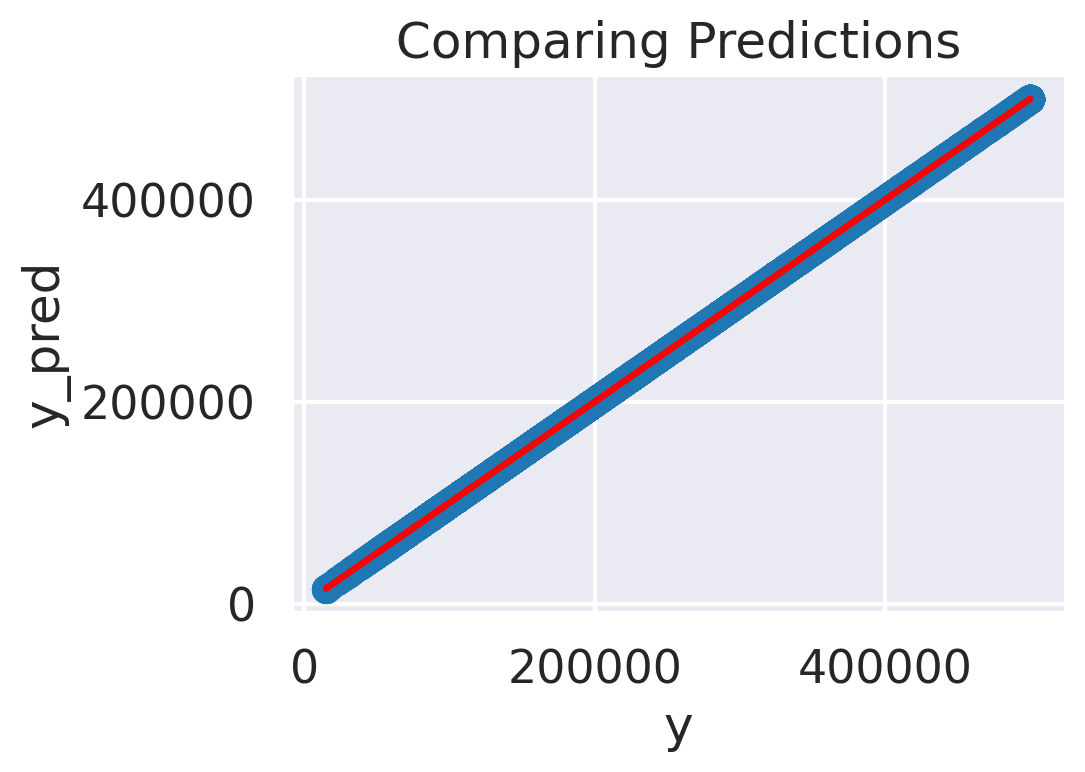

In [32]:
plt.figure(figsize=(5,3.5))

plt.scatter(y,model.predict(X))
plt.plot(y,y,color='r')

plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Comparing Predictions')

plt.show()

## Combatendo Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

# settings
sns.set_theme(context="talk", palette="tab10", color_codes=True, rc={"figure.figsize": [7, 4]})
%config InlineBackend.figure_format = "retina"

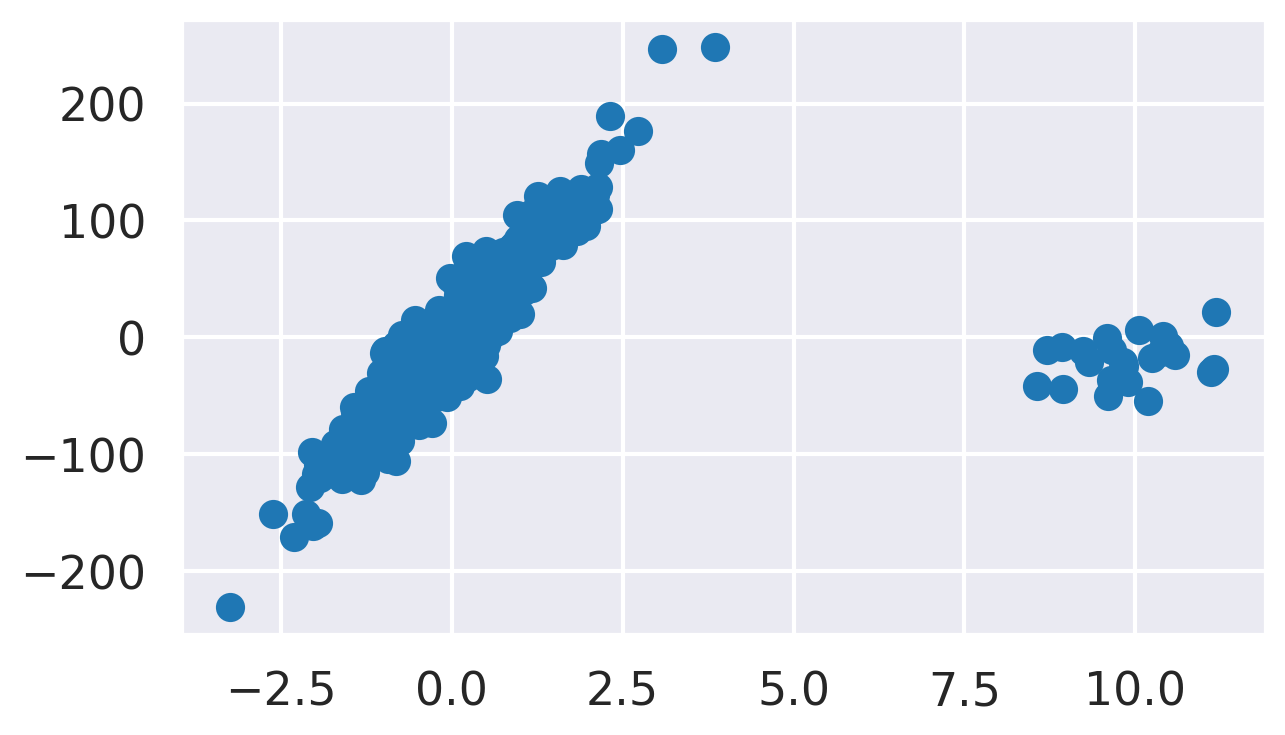

In [2]:
N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

In [5]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

fit_df

,linear_regression
-3.241267,-34.417132
-2.241267,-25.644817
-1.241267,-16.872502
-0.241267,-8.100187
0.758733,0.672128
1.758733,9.444443
2.758733,18.216758
3.758733,26.989073
4.758733,35.761388
5.758733,44.533703


### Huber Regression
A regressão de Huber é um exemplo de um algoritmo de regressão robusto que atribui menos peso a observações identificadas como outliers.


In [8]:
huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

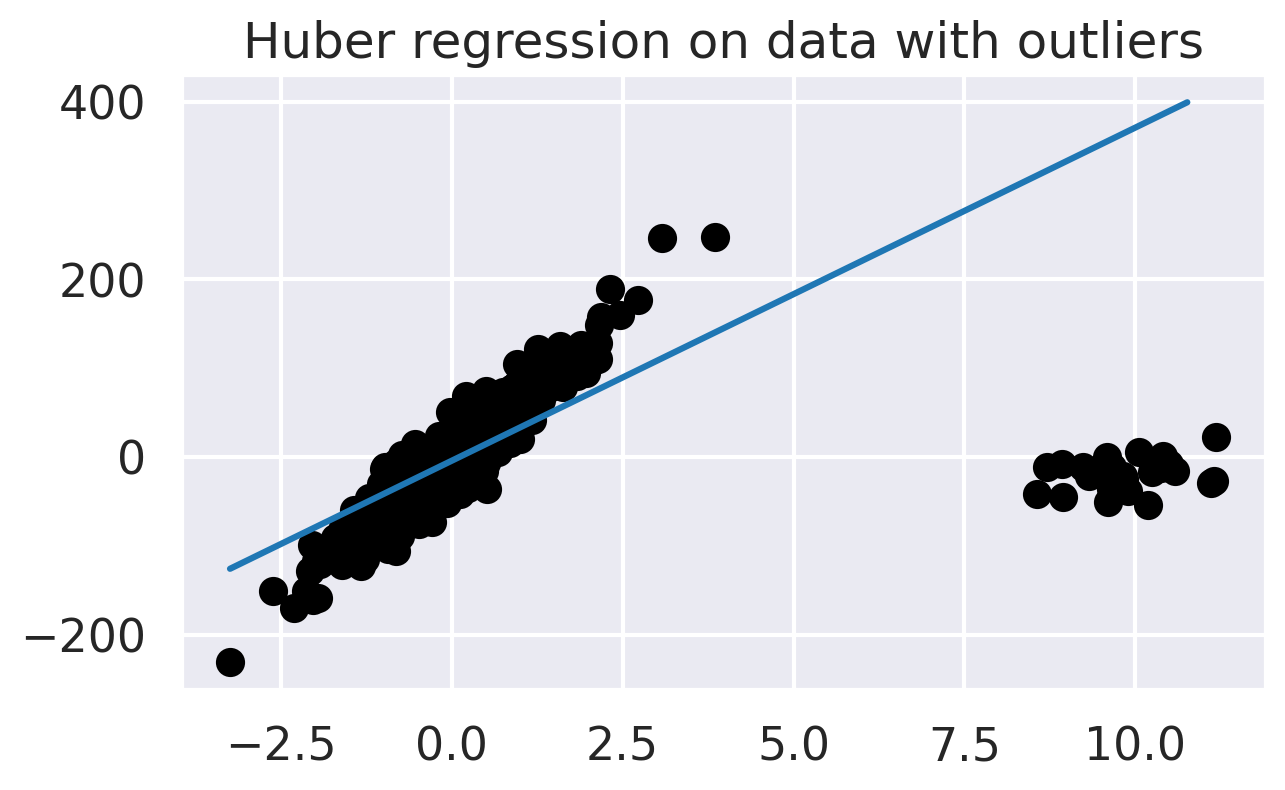

In [7]:
fix, ax = plt.subplots()
fit_df["huber_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Huber regression on data with outliers");

### RANSAC Regression

A regressão de consenso de amostra aleatória (RANSAC) é um algoritmo não determinístico que tenta separar os dados de treinamento em inliers (que podem estar sujeitos a ruído) e outliers. Então, ele estima o modelo final usando apenas os inliers.

Com a regressão RANSAC, você também pode inspecionar as observações que o modelo considerou como inliers e outliers.

In [9]:
ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

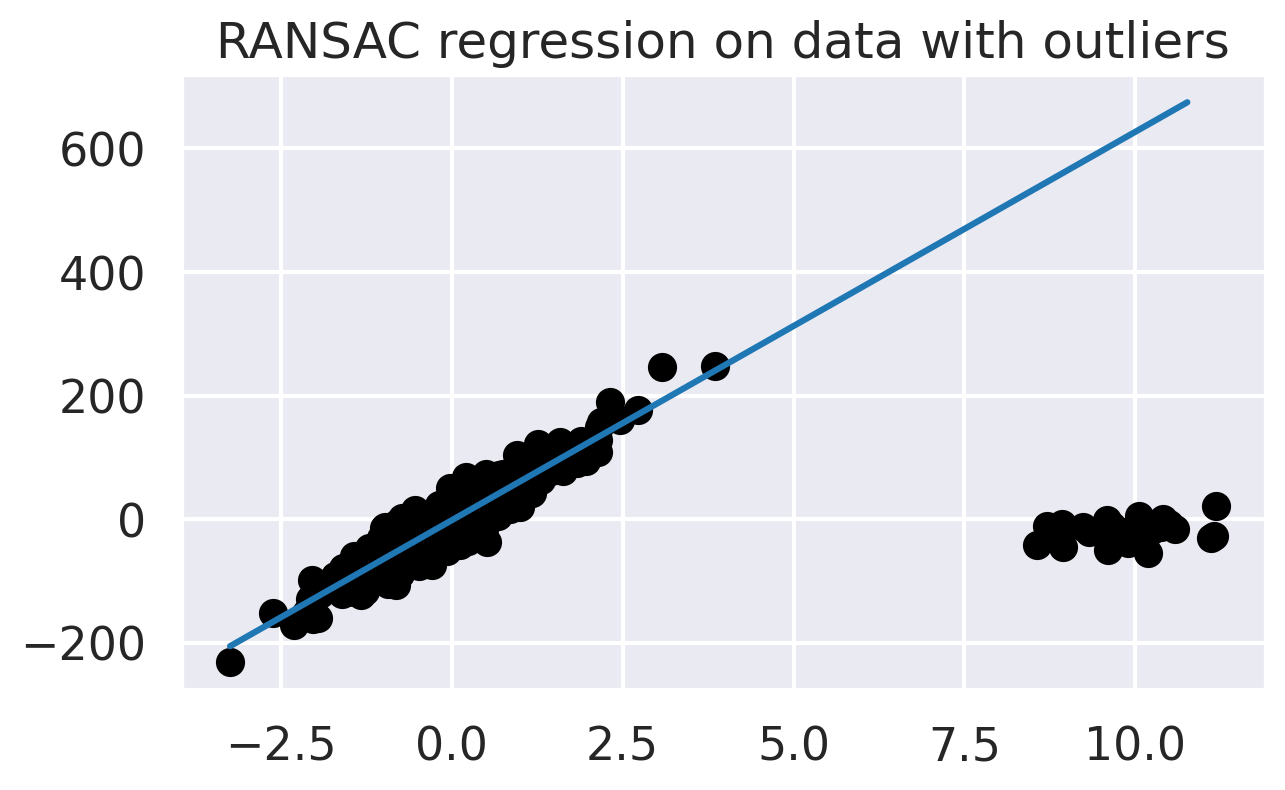

In [10]:
fix, ax = plt.subplots()
fit_df["ransac_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("RANSAC regression on data with outliers");

In [11]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers we have added ourselves: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

Total outliers: 51
Outliers we have added ourselves: 25 / 25


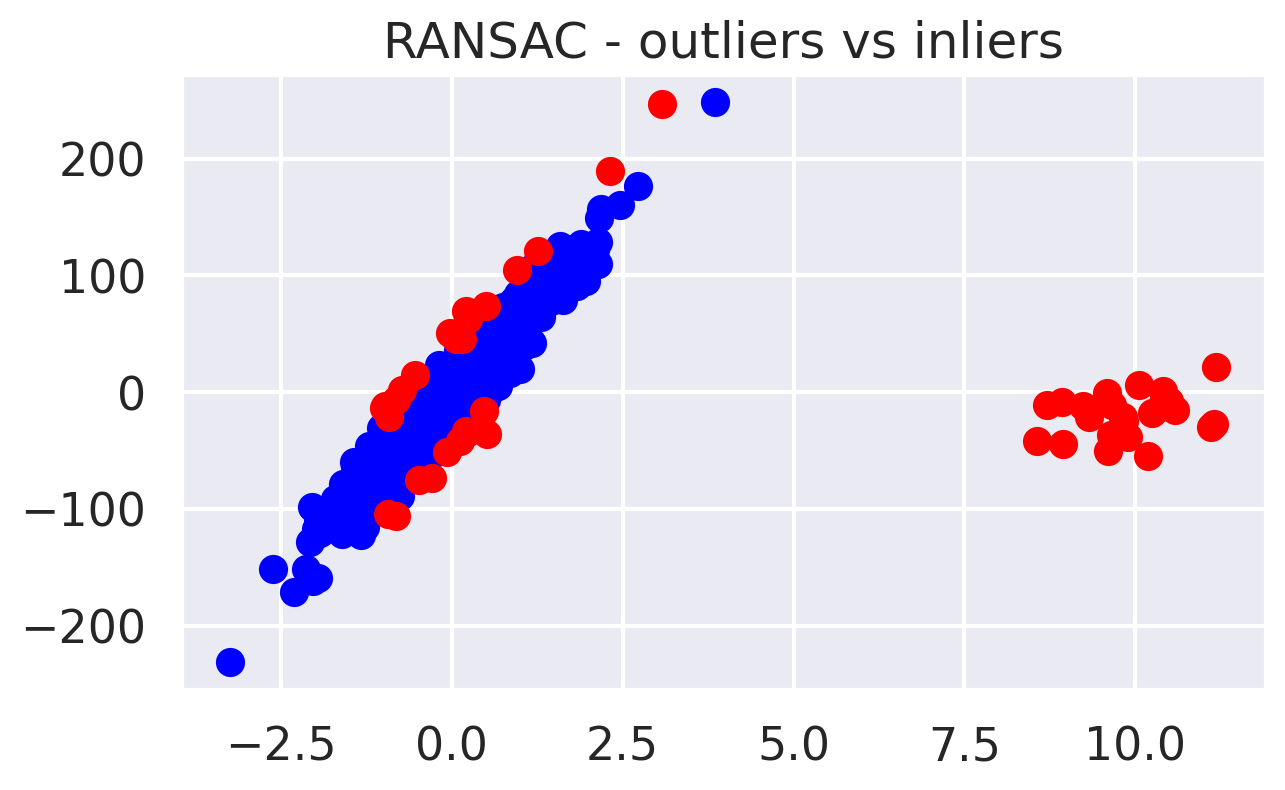

In [12]:
plt.scatter(X[inlier_mask], y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

### Theil-Sen

O último dos algoritmos de regressão robustos disponíveis scikit-learné a regressão Theil-Sen . É um método de regressão não paramétrico, o que significa que não faz nenhuma suposição sobre a distribuição de dados subjacente. Em resumo, envolve ajustar vários modelos de regressão em subconjuntos dos dados de treinamento e, em seguida, agregar os coeficientes na última etapa.

In [13]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

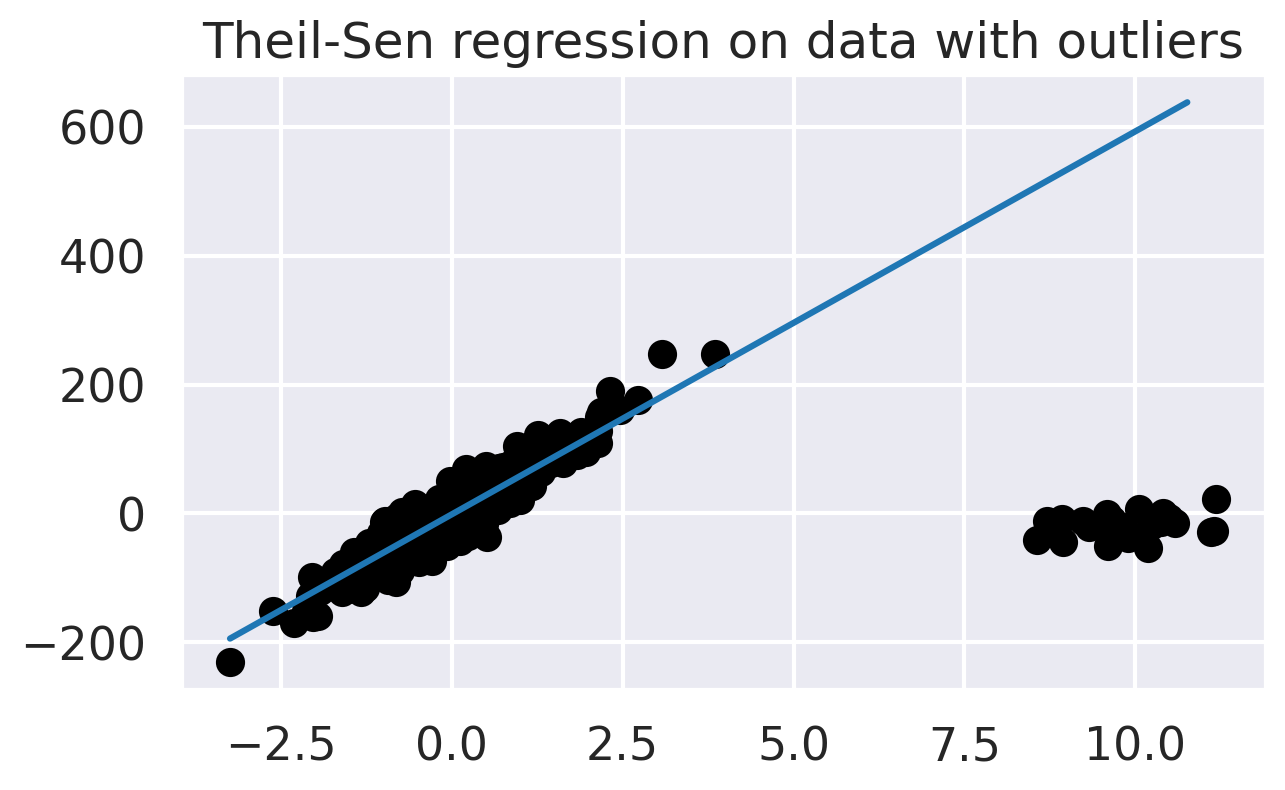

In [14]:
fix, ax = plt.subplots()
fit_df["theilsen_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Theil-Sen regression on data with outliers");

Esses modelos são em geral uma melhor alternativa à simplesmente eliminar (excluir) os outliers. Note que, diferentemente do Theil-Sen e RANSAC, a regressão de Huber não filtra completamente os outliers, mas apenas diminui seu efeito no ajuste.

### Exercício Modelo Robusto

In [25]:
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

X = df.drop(columns=['preco','banheiros','dormitorios'])
y = df['preco']

model = HuberRegressor(max_iter=1000, fit_intercept=False)
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y)) # R2
print()

calculate_metrics(df.preco, model.predict(df.drop(columns=['preco','banheiros','dormitorios'])))
print()

# Predição
y_pred = model.predict(df_case.drop(columns='dormitorios'))
print(f'Preço estimado (scikit-learn): {y_pred[0]:.2f}')

Coeficientes:  {'areaM2': 4492.655163637401, 'suites': 446841.5396600743, 'vagas': -34621.210541821376, 'dormitorios:suites': -93282.98294043326, 'areaM2:vagas': 1947.4920659271363}
Intercept:  0.0
Score (R2):  0.6937843793741134

MSE: 352859852413.90
RMSE: 594020.08
MAPE: 24.34
MAE: 375588.61
sMAPE: 22.55
MAD: 773278.64

Preço estimado (scikit-learn): 1128410.85


## Métricas de Erro
Existem diversas métricas de erro que podem ser úteis para avaliar a performance de um modelo

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)-> acostumar escrever assim


# Regressão Logística
Não devemos confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de **Classificação**.

A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

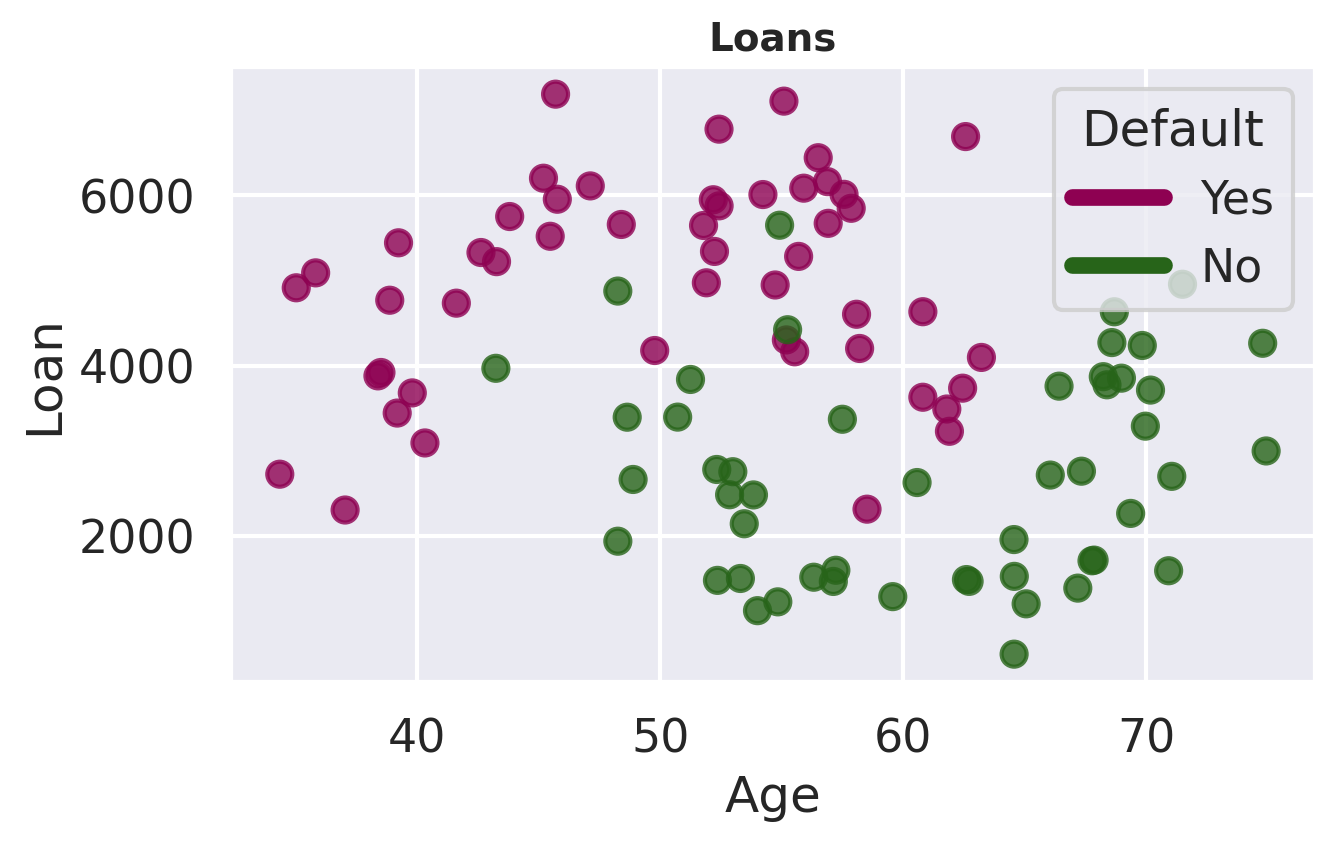

         age         loan  default
0  41.604235  4732.639984        0
1  45.688635  7188.319998        0
2  64.570169  1522.549822        1
3  52.984240  2752.321406        1
4  74.792752  4261.263330        1


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.datasets import make_moons
cmap_data = plt.cm.PiYG

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df_loans = pd.DataFrame({'age':X[:, 0], 'loan':X[:, 1], 'default':y})

df_loans.age = df_loans.age + 50 + df_loans.age*10
df_loans.loan = df_loans.loan + 3000 + df_loans.loan*3000

plt.scatter(df_loans.age, df_loans.loan, c=df_loans.default, cmap=cmap_data, alpha=0.8)
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("Age")
plt.ylabel("Loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['Yes', 'No'], loc='upper right',title='Default')

plt.show()

print(df_loans.head())

In [39]:
from sklearn.linear_model import LogisticRegression

# Definição das entradas e saídas do modelo
X = df[['x1','x2']]
y = df.y

# Classe do modelo e seus parâmetros
clf = LogisticRegression(max_iter=1000)

# Treinamento do modelo
clf.fit(X,y)

print( clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


> Os valores coef_ e clf.intercept_ são os parâmetros estimados para regressão logística e irão variar de modelo para modelo.

In [40]:
clf.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [42]:
# Probabilidade de ser cada classe
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [44]:
# Eficiência do modelo
clf.score(X,y)
sum( clf.predict(X) == y ) / len(X)

0.87

> O score corresponde à **Acuracidade do Modelo** sobre o nosso conjunto de treinamento `X`, isto é, o percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto. Você é possível obter o mesmo valor apenas contando o número de acertos da predição sobre o total de casos.

In [46]:
# Tabela de Acertos
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df

,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


## Dilema Viés-Variância

Parece bastante simples construir esses modelos, mas construir bons modelos pode ser uma tarefa bastante difícil.
Vamos nos deter um pouco mais sobre como podemos avaliar os modelos.  

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*).

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos.

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados.


## Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

In [47]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )

[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


> O parâmetro `stratify=y` indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo `y`. Os parâmetros `test_size=0.3` indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro `random_state=123` é para a reprodutibilidade dos resultados.

In [49]:
# Número de erros no teste
sum(y_test != y_pred)

2

## Acuracidade: Cuidado e Outras Métricas

Mas uma boa acuracidade geral (simplesmente o percentual total de acertos), pode não ser suficiente para produzir bons modelos e pode mesmo, mascarar modelos bastante ruins.

Veja este exemplo, um problema bastante comum de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 1 | 2 |
| Benigno | 0 | 97 |

A matriz acima é chamada de **matriz de confusão**. Ela apresenta nas linhas os valores reais dos dados e nas colunas as predições. São assim 3 casos reais de casos Malignos, mas apenas 1 foi classificado  corretamente e 2 desses casos foram classificados como benignos. Já os 97 benignos foram todos classificados corretamente. O modelo tem, portanto, acuracidade de 99%!!! ($2+97=$ total de casos classificados corretamente). Entretanto, é fácil ver, o modelo falha miseravelmente ao prever os casos Malignos (acerta apenas 33% desses casos), trazendo um grande risco aos pacientes. É um mal modelo apesar da alta acuracidade geral, e você pode notar que um modelo *trivial* que atribuísse à TODOS os casos a classe 'benigno', já daria uma acuracidade de 97%.